In [222]:
try:
    from newspaper import Article
    import pandas as pd
    import re
    from nltk.corpus import stopwords
    from nltk.sentiment import SentimentIntensityAnalyzer
    import numpy as np
    import matplotlib.pyplot as plt
except Exception as E:
    print(E)


In [234]:
def get_urltext(url, file_name):
    try:
        raw = Article(url)
        raw.download()
        raw.parse()
        text =raw.title +'\n'+raw.text
        #pattern = r'[^\x00-\x7F]'  # Matches any character outside the ASCII range
        #text = (re.sub(pattern,' ', text)).replace('  ','')
        file_path = "C:/Users/User/Documents/Python/Projects/Text analysis/Extracted data/" + file_name + ".txt"
        encode = 'UTF-8'
        with open(file_path, 'w', encoding=encode) as file:
            file.write(text)
        #print(text[0:400])
        print("File: {} created. \n".format(file_name))
    except:
        print('URL 404 error')

data = pd.read_excel("C:/Users/User/Documents/Python/Projects/Text analysis/Url - Inputs.xlsx")
data
for i in range(data.shape[0]):
    name = data.loc[i][0]
    url = data.loc[i][1]
    name = 'Wikipedia - '+name
    get_urltext(url,name)
    name = data.loc[i][0]
    url = data.loc[i][2]
    name = 'Encyclopedia - '+name
    get_urltext(url,name)
    

File: Wikipedia - Space created. 

File: Encyclopedia - Space created. 

File: Wikipedia - Globalization created. 

File: Encyclopedia - Globalization created. 

File: Wikipedia - Global Warming created. 

File: Encyclopedia - Global Warming created. 

File: Wikipedia - Italian Cuisine created. 

File: Encyclopedia - Italian Cuisine created. 

File: Wikipedia - The Mayans created. 

File: Encyclopedia - The Mayans created. 

File: Wikipedia - Health and wellness created. 

File: Encyclopedia - Health and wellness created. 

File: Wikipedia - Real Estate created. 

File: Encyclopedia - Real Estate created. 

File: Wikipedia - Natural Science created. 

File: Encyclopedia - Natural Science created. 

File: Wikipedia - Spirituality created. 

File: Encyclopedia - Spirituality created. 

File: Wikipedia - Artificial Intelligence created. 

File: Encyclopedia - Artificial Intelligence created. 

File: Wikipedia - Education Reform created. 

File: Encyclopedia - Education Reform created. 



In [235]:
class Analysis:
    def __init__(self):
        pass
    
    def read_txt(filename):
        try:
            filepath = "C:/Users/User/Documents/Python/Projects/Text analysis/Extracted data/"+filename+".txt"
            text = open(filepath,'r',encoding = 'UTF-8').read()
            return text
        except Exception as e:
            print("An error occurred:", str(e))
            

    def clean_txt(text):
        text = re.sub(r'[\-]',' ',text)
        text = re.sub(r'[^\w\s\.]','',text)     
        paras = [para for para in text.strip().split('\n') if len(para.split(' ')) > 3]        # parah
        text = [line for lines in paras for line in lines.strip().split('. ') if line != '']
        return text

    def word_count(text):
        words = [word.replace('.','') for words in text for word in words.strip().split(' ') if word.isalpha()] 
        return words
    
    def personal_pronounce(words):
        txt = (' ').join(words)
        txt = re.sub(r'\bUS\b','',txt)
        pronoun_pattern = r'\b(?:I|me|my|mine|myself|we|us|our|ourselves)\b'
        matches = re.findall(pronoun_pattern, txt, flags=re.IGNORECASE)
        count = len(matches)
        return count
    
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]  #Remove the stop words in the tokens
        return tokens
    
    def count_syllables(word):
        syllables = re.findall(r'[aeiouy]+', word.lower())
        if word.lower().endswith("es") or word.lower().endswith("ed"):
            syllables = syllables[:-1]  # Remove the last syllable
        return len(syllables)
    
    def identify_complex_words(tokens):
        complex_words = []
        for word in tokens:
            if Analysis.count_syllables(word) > 2 and  not (word.lower().endswith("es") or word.lower().endswith("ed")):
                complex_words.append(word)
        return len(complex_words)
    
    def syllables_word(tokens):
        total = 0
        for word in tokens:
            total +=Analysis.count_syllables(word)
        avg = total/len(tokens)
        return round(avg)
    
    def fog_index(word,cmpxword,avg_sent):
        fog = 0.4*(avg_sent/(cmpxword/word))
        return round(fog,2)
    
    def sentiment(text,word):
        text = (' ').join(text)
        sid = SentimentIntensityAnalyzer()
        sentiment_scores = sid.polarity_scores(text)
        # Extract positive, negative, polarity, and subjectivity scores
        pos = sentiment_scores['pos']*100
        neg = sentiment_scores['neg']*100
        pol = round((pos - neg)/((pos+neg)+0.000001),2)
        sub = ((pos+neg)/((word) + 0.000001))*100                      # NLTK's Vader doesn't provide subjectivity score
        return round(pos,1),round(neg,1),pol,round(sub,2)
    
    
    
def textual_analysis(filename):
    vector = []
    
    raw_text = Analysis.read_txt(filename)
    
    text = Analysis.clean_txt(raw_text)                                           # Sentences
    vector.append(len(text))
    
    words = Analysis.word_count(text)                                             # Words
    vector.append(len(words))
    
    PP = Analysis.personal_pronounce(words)                                       # Personal pronounce
    vector.append(PP)
    tokens = Analysis.remove_stopwords(words)                                     # remove stop words
    
    cmpx_word = Analysis.identify_complex_words(tokens)                           # complex words
    vector.append(cmpx_word)
    
    syll_word = Analysis.syllables_word(tokens)                                   # Syllables per word
    vector.append(syll_word)
    
    avg_word_length = [len(i) for i in words]
    avg_word_length = round(sum(avg_word_length)/len(words))                      # Average word length
    vector.append(avg_word_length)
    
    avg_sent_length = round(len(words)/len(text))                                 # Average word count in sentences
    vector.append(avg_sent_length)
    
    fog = Analysis.fog_index(len(words),cmpx_word,avg_sent_length)
    vector.append(fog)
    
    pos,neg,pol,sub = Analysis.sentiment(text,len(words))                         # sentimental analysis
    vector.append(pos)
    vector.append(neg)
    vector.append(pol)
    vector.append(sub)
    return(vector)
    

In [246]:
data = pd.read_excel("C:/Users/User/Documents/Python/Projects/Text analysis/Url - Inputs.xlsx")
vectors = []
index = [[],[]]
for i in range(data.shape[0]):
    # wiki file
    filename = data.loc[i][0]
    index[0].append(filename)
    filename = "Wikipedia - "+filename
    wiki = textual_analysis(filename)
    vectors.append(wiki)
    index[1].append('Wikipedia')
    # Encyclopedia file
    filename = data.loc[i][0]
    index[0].append(filename)
    filename = "Encyclopedia - "+filename
    encyclo = textual_analysis(filename)
    index[1].append('Encyclopedia')
    vectors.append(encyclo)
    
df = pd.DataFrame(vectors,index = index,columns=['Sentence','Word','Personal Pronounce','Complex words','Avg_Syllables','Avg_words','Avg_sentence','Fog_Index','Positive','Negative','Polarity','Subjectivity'])
df

Sentence   Word  Personal Pronounce  \
Space                   Wikipedia          279   6748                   1   
                        Encyclopedia       330   6564                  86   
Globalization           Wikipedia          467  12081                   7   
                        Encyclopedia       666  10968                  15   
Global Warming          Wikipedia          308   9310                   1   
                        Encyclopedia       212   3926                   3   
Italian Cuisine         Wikipedia          561  12129                   4   
                        Encyclopedia        84   1324                   0   
The Mayans              Wikipedia          485  14692                   7   
                        Encyclopedia        63   1165                   0   
Health and wellness     Wikipedia           33    976                   1   
                        Encyclopedia        26    493                   2   
Real Estate             Wikipedia           48   1094                   0   
                        Encyclopedia        51    732                   0   
Natural Science         Wikipedia          253   5330                   4   
                        Encyclopedia         6    134                   0   
Spirituality            Wikipedia          260   5408                   1   
                        Encyclopedia       227   3030                   5   
Artificial Intelligence Wikipedia          431  10273                  14   
                        Encyclopedia       160   3784                  13   
Education Reform        Wikipedia          406   9580                   6   
                        Encyclopedia       570  10366                   6   

                                      Complex words  Avg_Syllables  Avg_words  \
Space                   Wikipedia              1267              2          5   
                        Encyclopedia           1133              2          5   
Globalization           Wikipedia              2799              2          6   
                        Encyclopedia           2643              2          6   
Global Warming          Wikipedia              1906              2          5   
                        Encyclopedia            706              2          5   
Italian Cuisine         Wikipedia              2557              2          5   
                        Encyclopedia            264              2          5   
The Mayans              Wikipedia              2324              2          5   
                        Encyclopedia            234              2          5   
Health and wellness     Wikipedia               194              2          5   
                        Encyclopedia            111              2          5   
Real Estate             Wikipedia               216              2          5   
                        Encyclopedia            184              2          5   
Natural Science         Wikipedia              1315              3          6   
                        Encyclopedia             35              3          5   
Spirituality            Wikipedia              1325              2          5   
                        Encyclopedia            670              2          5   
Artificial Intelligence Wikipedia              2151              2          5   
                        Encyclopedia            768              2          5   
Education Reform        Wikipedia              2131              2          6   
                        Encyclopedia           1810              2          5   

                                      Avg_sentence  Fog_Index  Positive  \
Space                   Wikipedia               24      51.13       7.9   
                        Encyclopedia            20      46.35       7.7   
Globalization           Wikipedia               26      44.89      10.7   
                        Encyclopedia            16      26.56      11.8   
Global Warming          Wik

#### Explanation

In [249]:
df1 = df.reset_index(names=['Topic', 'Source'])  # Remove multi-index and provide column name for better access

### Words count - Wikipedia vs Encyclopedia

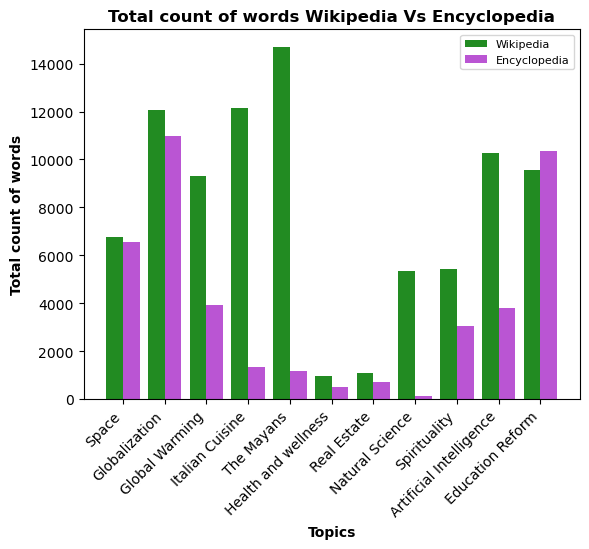

In [248]:
grp1 = df1[['Topic','Source','Word','Sentence']]
#print(grp1['Topic'].unique().tolist())
A = grp1.loc[df1['Source']=='Wikipedia'].Word.tolist()
B = grp1.loc[df1['Source']=='Encyclopedia'].Word.tolist()


X = grp1['Topic'].unique().tolist()  
X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, A, 0.4, label = 'Wikipedia', color = '#228b22') 
plt.bar(X_axis + 0.2, B, 0.4, label = 'Encyclopedia', color='#ba55d3') 
  
plt.xticks(X_axis, X) 
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Topics", fontweight='bold') 
plt.ylabel("Total count of words", fontweight='bold', ) 
plt.title("Total count of words Wikipedia Vs Encyclopedia", fontweight='bold', fontsize=12) 
plt.legend(fontsize=8) 
plt.show() 

#### Bar Chart: Total Word Count Comparison

This bar chart displays the total word count for each topic extracted from both Wikipedia and Encyclopedia articles. Each bar represents a different topic, with the height of the bar indicating the total word count.

Observations:

1. The article about 'The Mayans' in Wikipedia has the highest word count among all topics analyzed, indicating a comprehensive coverage of the subject matter.
2. In contrast, the article 'Globalization' in Encyclopedia exhibits the highest word count, suggesting detailed coverage of this topic in that source.
3. 'Natural Science' in Encyclopedia has the lowest word count among all topics, implying a relatively concise treatment of this subject.
4. Notably, most articles from Wikipedia have word counts exceeding 6,000, indicating extensive content and in-depth exploration of the topics.

Conclusion:
This visualization highlights the variations in word counts between Wikipedia and Encyclopedia articles for different topics. It underscores the detailed coverage and extensive content typically found in Wikipedia articles, particularly evident in topics like 'The Mayans', while also showcasing specific topics where Encyclopedia articles may provide more comprehensive information.


### Words and sentences count comparison on wikipedia & Encyclopedia

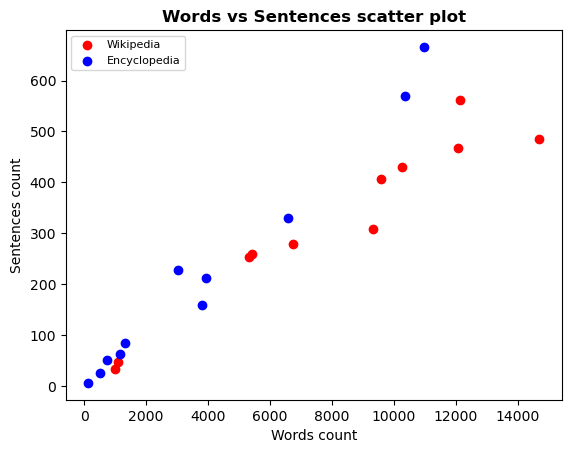

In [250]:
A1 = grp1.loc[df1['Source']=='Wikipedia'].Sentence.tolist()
B1 = grp1.loc[df1['Source']=='Encyclopedia'].Sentence.tolist()
plt.scatter(A, A1, c='Red')
plt.scatter(B, B1, c = 'Blue')
plt.legend(["Wikipedia", "Encyclopedia"], loc="upper left", fontsize=8)
plt.xlabel('Words count')
plt.ylabel('Sentences count')
plt.title('Words vs Sentences scatter plot', fontsize = 12, fontweight='bold')
plt.show()

##### Scatter Plot: Word Count vs. Sentence Count
This scatter plot illustrates the relationship between word count (x-axis) and sentence count (y-axis) for articles from both ‘Wikipedia.com’ and ‘Encyclopedia.com’. Each data point represents an article, with blue dots representing Encyclopedia articles and red dots representing Wikipedia articles.

Observations:
1. The scatter plot reveals a positive linear pattern, indicating a moderate positive correlation between word count and sentence count.
2. Articles with higher word counts tend to have more sentences, suggesting a relationship between the length of the text and the complexity or depth of the content.
3. While the pattern is not perfectly straight, it still demonstrates a noticeable trend where articles with higher word counts generally exhibit more sentences.
4. The distribution of data points across the plot shows variability in both word count and sentence count for articles from both sources.

Conclusion:
This scatter plot provides insight into the relationship between word count and sentence count in Wikipedia and Encyclopedia articles. The observed positive linear pattern suggests that as the word count increases, the number of sentences tends to increase as well, indicating a potential correlation between content length and complexity.


### Polarity score of Wikipedia Vs Encyclopedia

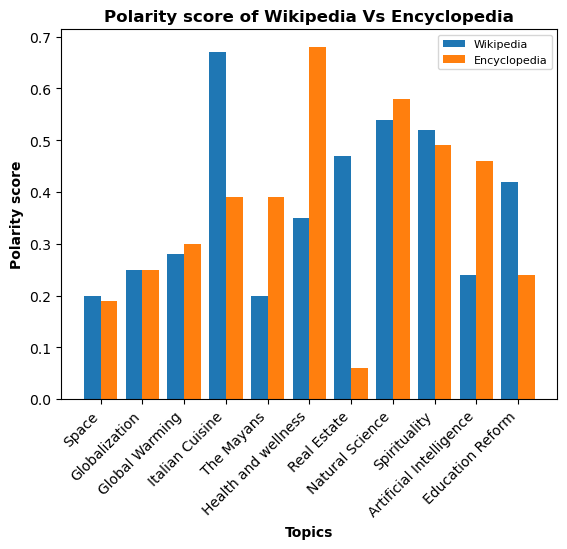

In [251]:
grp2 = df1[['Topic','Source','Polarity']]
Wiki = grp2.loc[df1['Source']=='Wikipedia'].Polarity.tolist()
Enclo = grp2.loc[df1['Source']=='Encyclopedia'].Polarity.tolist()
#print(Wiki,Enclo)

X = grp1['Topic'].unique().tolist()

Ygirls = A
Zboys = B
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Wiki, 0.4, label = 'Wikipedia') 
plt.bar(X_axis + 0.2, Enclo, 0.4, label = 'Encyclopedia') 
  
plt.xticks(X_axis, X) 
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Topics", fontweight='bold') 
plt.ylabel("Polarity score", fontweight='bold', ) 
plt.title("Polarity score of Wikipedia Vs Encyclopedia", fontweight='bold', fontsize=12) 
plt.legend(fontsize=8) 
plt.show() 


#### Bar Plot: Polarity Score Comparison

In this bar plot, we compare the polarity scores of articles extracted from both Encyclopedia and Wikipedia. Polarity score measures the sentiment expressed in the text, indicating whether the overall sentiment of the content is positive, negative, or neutral. A polarity score close to 1 indicates a highly positive sentiment, while a score close to -1 suggests a highly negative sentiment. A score around 0 indicates a neutral sentiment.

Observations:
1. The polarity scores of articles from both Encyclopedia and Wikipedia are compared.
2. Most articles have polarity scores exceeding 0.2, indicating a predominantly positive sentiment in the content.
3. Specifically, the article on 'Health and Wellness' from Encyclopedia and 'Italian Cuisine' from Wikipedia have the highest polarity scores, suggesting overwhelmingly positive sentiment in these topics.
4. Conversely, the article on 'Real Estate' from Encyclopedia exhibits the lowest polarity score of less than 0.01, indicating a relatively neutral or possibly mixed sentiment.

Conclusion:
This bar plot provides insight into the sentiment expressed in articles from Encyclopedia and Wikipedia, as indicated by their polarity scores. The predominance of positive polarity scores suggests that the majority of the content analyzed tends to convey positive sentiment. However, variations in polarity scores among different topics highlight the nuanced sentiment expressed in each article.

### Fog-Index of each artice from Wikipedia vs Encyclopedia

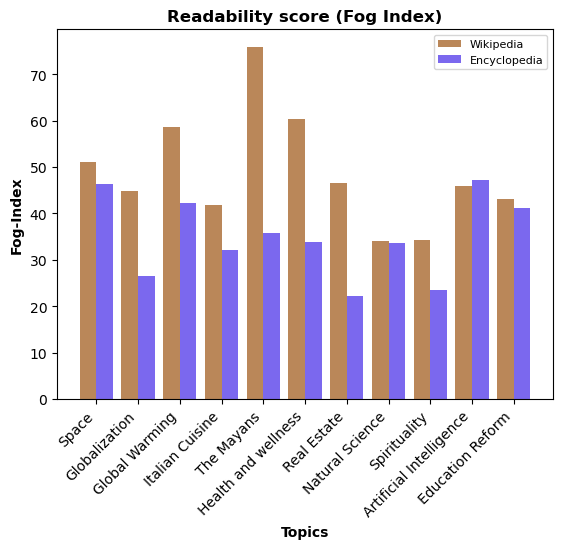

In [241]:
grp2 = df1[['Topic','Source','Fog_Index']]
Wiki = grp2.loc[df1['Source']=='Wikipedia'].Fog_Index.tolist()
Enclo = grp2.loc[df1['Source']=='Encyclopedia'].Fog_Index.tolist()

X = grp1['Topic'].unique().tolist()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, Wiki, 0.4, label = 'Wikipedia', color = '#ba8759') 
plt.bar(X_axis + 0.2, Enclo, 0.4, label = 'Encyclopedia', color = '#7b68ee') 
  
plt.xticks(X_axis, X) 
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Topics", fontweight='bold') 
plt.ylabel("Fog-Index", fontweight='bold') 
plt.title("Readability score (Fog Index)", fontweight='bold', fontsize=12) 
plt.legend(fontsize=8) 
plt.show() 


#### Bar Chart: FOG Index Comparison

In this bar chart, we compare the FOG index of articles extracted from both Encyclopedia and Wikipedia. The FOG index is a readability measure that estimates the complexity of a piece of text based on the average number of words per sentence and the percentage of complex words (words with three or more syllables).

Observations:
1. The FOG index provides an indication of the readability level of the content, with higher values suggesting greater complexity.
2. All articles analyzed in this comparison have FOG index scores above 20, indicating relatively complex content across the board.
3. The article on 'The Mayans' from Wikipedia stands out with the highest FOG index, exceeding 70, suggesting highly complex language and sentence structures.
4. In contrast, the article on 'Real Estate' from Encyclopedia has the lowest FOG index, approximately around 20, indicating comparatively simpler language and sentence structures.
5. Overall, Wikipedia articles tend to have higher FOG index scores compared to Encyclopedia articles, suggesting a generally higher level of complexity in Wikipedia content.

Conclusion:
This bar chart highlights the differences in readability level between articles from Wikipedia and Encyclopedia, as measured by the FOG index. The varying FOG index scores reflect differences in the complexity of language and sentence structures used in the content, with Wikipedia articles generally exhibiting higher levels of complexity compared to Encyclopedia articles.

### Co-relation between words count and fog index 

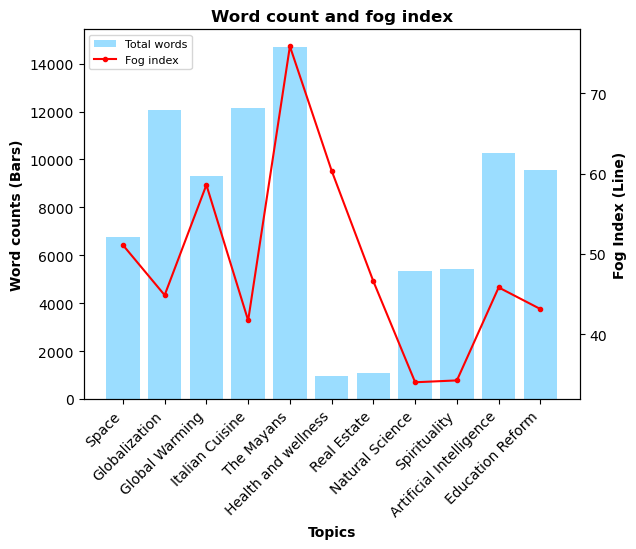

In [242]:
grp2 = df1[['Topic','Source','Word','Fog_Index']]
fog = grp2.loc[df1['Source']=='Wikipedia'].Fog_Index.tolist()
word = grp2.loc[df1['Source']=='Wikipedia'].Word.tolist()
#print(Wiki,Enclo)

# Sample data
categories = grp1['Topic'].unique().tolist()
values_bar = word
values_line = fog
X_axis = np.arange(len(X))

X = grp1['Topic'].unique().tolist()

fig, ax1 = plt.subplots()
ax1.bar(categories, values_bar, color='#9bddff', label='Total words')                        #Bar chart
plt.xticks(X_axis, categories) 
plt.xticks(rotation = 45, ha='right')
ax2 = ax1.twinx()
ax2.plot(categories, values_line, color='red', marker='.', label='Fog index')           #line Chart

#lable
ax1.set_ylabel('Word counts (Bars)',fontweight='bold')
ax2.set_ylabel('Fog Index (Line)',fontweight='bold')
ax1.set_xlabel('Topics',fontweight='bold')
ax1.set_title('Word count and fog index',fontweight='bold',fontsize=12) 

# Display legend
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2, loc='upper left',fontsize=8)

# Show plot
plt.show()


#### Pareto Chart: Word Count vs. FOG Index

In this Pareto chart, we compare the word count and FOG index of articles from Wikipedia. The bar chart represents the word count for each article, while the line chart depicts the corresponding FOG index.

Observations:
1. The Pareto chart provides a visual comparison of two key metrics: word count and FOG index, offering insights into the relationship between content length and readability complexity.
2. While there is no clear linear relationship between word count and FOG index across all articles, some notable patterns emerge.
3. 'The Mayans' article stands out with the highest word count and FOG index, indicating extensive content and highly complex language and sentence structures.
4. Conversely, articles such as 'Health and Wellness' and 'Real Estate' have lower word counts but comparatively high FOG index scores, suggesting that despite shorter lengths, these articles exhibit complexity in language and sentence structures.
5. The lack of a consistent trend between word count and FOG index underscores the nuanced nature of content complexity, which may be influenced by various factors beyond sheer word count.

Conclusion:
This Pareto chart highlights the variability in content length and readability complexity among Wikipedia articles. While some articles demonstrate a correlation between word count and FOG index, others defy this pattern, suggesting that factors beyond word count alone influence readability complexity. Understanding these nuances can aid in assessing the comprehensiveness and accessibility of textual content.

             **Positive score - Negative score - Subjective score**


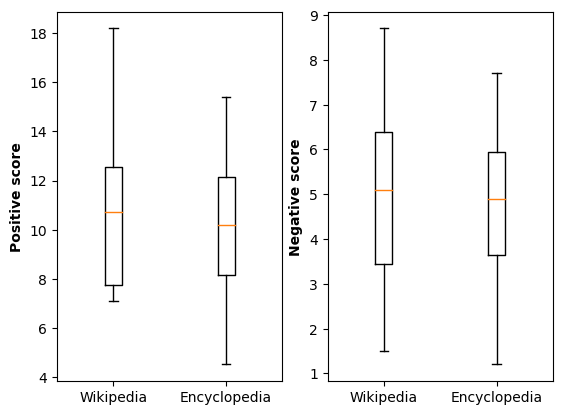

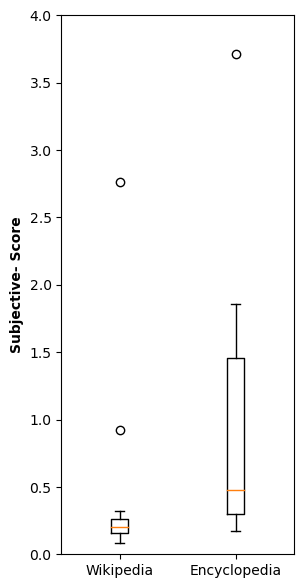

In [243]:
grp1 = df1[['Topic','Source','Positive','Negative','Subjectivity']]
P = grp1.loc[df1['Source']=='Wikipedia'].Positive.tolist()
P1 = grp1.loc[df1['Source']=='Encyclopedia'].Positive.tolist()
N = grp1.loc[df1['Source']=='Wikipedia'].Negative.tolist()
N1 = grp1.loc[df1['Source']=='Encyclopedia'].Negative.tolist()
S = grp1.loc[df1['Source']=='Wikipedia'].Subjectivity.tolist()
S1 = grp1.loc[df1['Source']=='Encyclopedia'].Subjectivity.tolist()

print('             **Positive score - Negative score - Subjective score**')
plt.subplot(1, 2, 1) # index 1
plt.boxplot([P,P1],labels=['Wikipedia','Encyclopedia'])
plt.ylabel('Positive score',fontweight='bold')
plt.subplot(1, 2, 2) # index 2
plt.boxplot([N,N1],labels=['Wikipedia','Encyclopedia'])
plt.ylabel('Negative score',fontweight='bold')
plt.show()
plt.figure(figsize=(3,7))
plt.boxplot([S,S1],labels=['Wikipedia','Encyclopedia'])
plt.ylabel('Subjective- Score', fontweight='bold')
plt.ylim(0,4)
plt.show()

#### Box Plots: Positive Score, Negative Score, and Subjectivity Score Comparison

In these box plots, we compare the positive score, negative score, and subjectivity score of articles from both Encyclopedia and Wikipedia. Additionally, we'll delve into the concept of subjectivity score and its significance in textual analysis. Subjectivity score measures the degree of subjectivity or objectivity expressed in the text. A subjectivity score close to 0 suggests a more objective presentation of information, while a score closer to 1 indicates a more subjective or opinionated tone. In the context of this analysis, subjectivity score helps discern the nature of content presentation. The box plots for positive score and negative score show the distribution of scores for articles from Encyclopedia and Wikipedia, highlighting any differences in sentiment between the two sources.

Observations:
1. Wikipedia articles tend to have mostly positive sentiment, with low outliers indicating occasional negative sentiment. Conversely, Encyclopedia articles exhibit similar distributions for positive and negative scores, with comparable means.
2. While positive and negative scores exhibit similar distributions between Encyclopedia and Wikipedia, subjectivity score reveals contrasting patterns.
3. Wikipedia articles tend to have lower subjectivity scores, with the majority of scores falling within the range of 0 to 0.5, indicating a more objective presentation of information.
4. In contrast, Encyclopedia articles display higher subjectivity scores, with a wider range spanning from 0.2 to 2.0, suggesting a broader spectrum of subjectivity and potentially more opinionated content.
5. The presence of outliers in subjectivity score for both sources signifies instances where articles deviate significantly from the typical subjectivity level observed within their respective datasets.

Conclusion:
These box plots offer insights into the sentiment and subjectivity expressed in Encyclopedia and Wikipedia articles. While both sources exhibit similar sentiment distributions, their subjectivity scores diverge, reflecting differences in editorial style and content presentation. Understanding these nuances aids in evaluating the reliability and objectivity of information provided by different sources.

### Extra Analysis

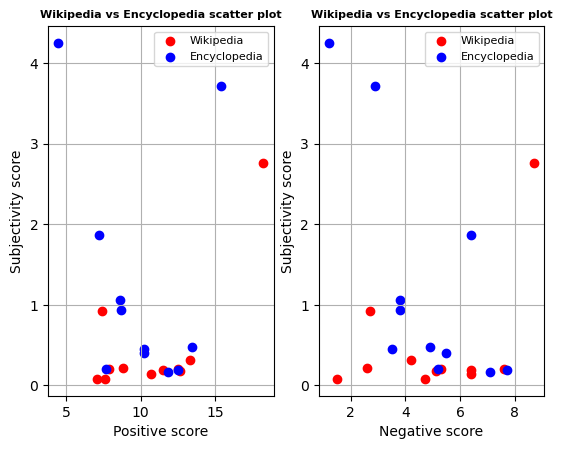

In [244]:
grp1 = df1[['Topic','Source','Positive','Negative','Subjectivity']]
P = grp1.loc[df1['Source']=='Wikipedia'].Positive.tolist()
P1 = grp1.loc[df1['Source']=='Encyclopedia'].Positive.tolist()
N = grp1.loc[df1['Source']=='Wikipedia'].Negative.tolist()
N1 = grp1.loc[df1['Source']=='Encyclopedia'].Negative.tolist()
S = grp1.loc[df1['Source']=='Wikipedia'].Subjectivity.tolist()
S1 = grp1.loc[df1['Source']=='Encyclopedia'].Subjectivity.tolist()

plt.subplot(1, 2, 1) # index 1
#plt.figure(figsize=(4,4))
plt.scatter(P, S, c='Red')
plt.scatter(P1, S1, c = 'Blue')
plt.legend(["Wikipedia", "Encyclopedia"], loc="upper right", fontsize=8)
plt.xlabel('Positive score')
plt.ylabel('Subjectivity score')
plt.title('Wikipedia vs Encyclopedia scatter plot', fontsize = 8, fontweight='bold')
plt.grid()

plt.subplot(1, 2, 2) # index 2
#plt.figure(figsize=(4,4))
plt.scatter(N, S, c='Red')
plt.scatter(N1, S1, c = 'Blue')
plt.legend(["Wikipedia", "Encyclopedia"], loc="upper right", fontsize=8)
plt.xlabel('Negative score')
plt.ylabel('Subjectivity score')
plt.title('Wikipedia vs Encyclopedia scatter plot', fontsize = 8, fontweight='bold')
plt.grid()

plt.show()